In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

print(cv2.__version__)

4.1.2


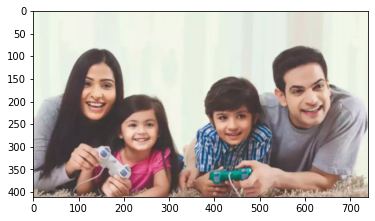

In [4]:

prototxt = './deploy.prototxt'
model = './res10_300x300_ssd_iter_140000.caffemodel'
image = './image.jpg'  #測試檔案
conf = 0.5 #0.5以上都認為是對的


net = cv2.dnn.readNetFromCaffe(prototxt, model) #讀取模型
image = cv2.imread(image) #讀取影像
plt.imshow(image[:, :, ::-1])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))


In [5]:
net.setInput(blob)#把影像的圖丟進模型中
detections = net.forward()

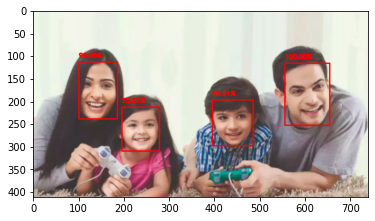

In [6]:
for i in range(0, detections.shape[2]):#把結果畫出來
    confidence = detections[0, 0, i, 2]
    if confidence > conf:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.imshow(image[:, :, ::-1])

##family圖片測試

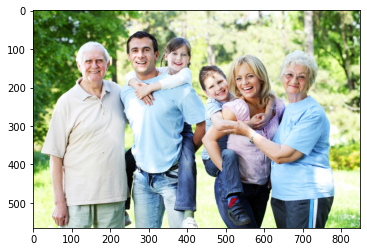

In [7]:

prototxt = './deploy.prototxt'
model = './res10_300x300_ssd_iter_140000.caffemodel'
image = './family.jpg'  #測試檔案
conf = 0.5 #0.5以上都認為是對的


net = cv2.dnn.readNetFromCaffe(prototxt, model) #讀取模型
image = cv2.imread(image) #讀取影像
plt.imshow(image[:, :, ::-1])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))

In [8]:
net.setInput(blob)#把影像的圖丟進模型中
detections = net.forward()

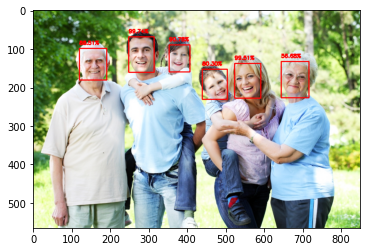

In [9]:
for i in range(0, detections.shape[2]):#把結果畫出來
    confidence = detections[0, 0, i, 2]
    if confidence > conf:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.imshow(image[:, :, ::-1])